# Sprint 機械学習スクラッチ 線形回帰

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
hθ(x)=θ_0x_0+θ_1x_1+...+θj_xj+...+θ_nx_n.(x_0=1)
$$

$x$ : 特徴量ベクトル


$\theta$ : パラメータベクトル


$n$ : 特徴量の数


$x_j$ : j番目の特徴量


$\theta_j$ : j番目のパラメータ（重み）


特徴量の数$n$は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。


$$
hθ(x)=θT⋅x
$$
雛形


クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
θj:=θj−
α
1
m
m
∑
i
=
1
 
[
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
]
$$

$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


雛形


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です。

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。


L
(
θ
)
=
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） 
J
(
θ
)
 は次の式です。


J
(
θ
)
=
1
2
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.

m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解値

In [80]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """

    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        #np.random.seed(0)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # 訓練データ・学習データのインスタンス変数化
        self.X, self.y, self.X_val, self.y_val, self.theta = self._setting(X, y, X_val, y_val)
            

        for i in range(self.iter):
            self.linear_hypo = self._linear_hypothesis(self.X)
            #print("linear_hypothetis", self.linear_hypo)
            #print("linear_hypothetis.shape", self.linear_hypo.shape)
            
            self.grad = self._gradient_descent(self.X, self.y)
            #print("[theta]", self.grad)
            #print("[theta].shape", self.grad.shape)
            
            self.pred = self.predict(self.X)
            #print("[pred]", self.pred)
            
            self.loss[i] = self.loss_func(self.y)
            
            if self.verbose:
                # verboseをTrueにした際は学習過程を出力
                print("iter{}:[loss]:{}".format(i, self.loss[i]))

            if X_val is not None and y_val is not None:
                self.val_loss[i] = self.loss_func(self.y_val)
                print("iter{}:[val_loss]:{}".format(i, self.val_loss[i]))
                

    def _setting(self, X, y, X_val, y_val):       
        X_copy = np.copy(X)
        y_copy = np.copy(y)
        
        if X_val is not None and y_val is not None:
            X_val_copy = np.copy(X_val)
            y_val_copy = np.copy(y_val)
                
        if self.no_bias == False:
            X_ones = np.ones(X.shape[0]).reshape(-1, 1)
            X_val_ones = np.ones(X_val.shape[0]).reshape(-1, 1)                
            X_copy = np.hstack((X_ones, X_copy))
            X_val_copy = np.hstack((X_val_ones, X_val_copy))
            np.random.seed(0)
            theta = np.random.randn(X.shape[1] + 1)
            return X_copy, y_copy, X_val_copy, y_val_copy, theta

        else:
            theta = np.random.randn(X.shape[1])
            return X_copy, y_copy, X_val_copy, y_val_copy, theta

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        self.hypo = np.dot(self.X, self.theta.T)

        return self.hypo

    def _gradient_descent(self, X, y, alpha=0.01, error=0):
        """
        最急降下法

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        alpha：学習率

        Returns
        -------

        """
        m = len(self.y)

        grad = np.dot(self.X.T,(self.linear_hypo-self.y))
        
        grad_average = np.average(grad, axis=1)
        
        self.theta = self.theta - alpha*grad_average
                
        return self.theta

    def predict(self, X):#self.linear_hypo
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # print(self.X)

        pred = np.dot(self.X, self.grad.T)

        return pred
    
    def loss_func(self, y):
        """
        損失関数の計算

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples,)
        訓練データまたはテストデータ

        Returns
        ----------
        """
        loss = np.average((self.pred - y) ** 2) / 2

        return loss

## 問題1  単独で作成した関数

def _linear_hypothesis(X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    line_hypo = np.dot(X, theta.T)
    
    return line_hypo

## 問題２　単独で作成した関数

def _gradient_descent_1(X, y, alpha=0.1, error=0):
    """
    最急降下法

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    
    alpha：学習率

    Returns
    -------
    
    """
    # データフレーム型だった場合にnd_array型に変換
    if type(X) is pd.core.frame.DataFrame:
        X = X.values
        
    np.random.seed(0)
    theta = np.random.random(size=X.shape[1])

    y = np.ones(5)
    
    # gradientを求める
    gradient = 0
    for x in range(X.shape[1]):
        gradient += alpha * (_linear_hypothesis(X)[x] - y[x]) * X[x, :]
    
    gradient = gradient / X.shape[1]
    
    # thetaの更新
    error = theta - gradient
    
    return error

## 問題3 単独で作成した関数
def predict(X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """

    theta = np.random.random(size=X.shape[1])
    theta = np.dot(X, _gradient_descent(X).T)    
    
    return theta

In [81]:
# 問題4

def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.average((y_pred - y) ** 2)
    
    return mse

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [8]:
df = pd.read_csv("../Week4/train.csv")
df = df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
from sklearn.model_selection import train_test_split

# X変数には2つ、y変数にはSalePriceを抽出
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = df.loc[:, ["SalePrice"]]

# スクラッチ関数で分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 2)
(365, 2)
(1095, 1)
(365, 1)


## 標準化せずに実行

In [44]:
# sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# 係数
display(lr.coef_)
# 切片
display(lr.intercept_)

array([[  98.588892  , 1041.18622755]])

array([-2021422.10210011])

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [82]:
scr_lr = ScratchLinearRegression(num_iter=100, 
                                 lr=0.01, 
                                 no_bias = False,
                                 verbose=True)

scr_lr.fit(X_train, y_train, X_test, y_test)

iter0:[loss]:8.103016024494817e+25
iter0:[val_loss]:8.1030160235461e+25
iter1:[loss]:3.7256245732678916e+41
iter1:[val_loss]:3.725624573267891e+41
iter2:[loss]:1.7165104408148675e+57
iter2:[val_loss]:1.7165104408148658e+57
iter3:[loss]:7.908494361975749e+72
iter3:[val_loss]:7.908494361975752e+72
iter4:[loss]:3.643687890631828e+88
iter4:[val_loss]:3.643687890631827e+88
iter5:[loss]:1.678759677464093e+104
iter5:[val_loss]:1.6787596774640928e+104
iter6:[loss]:7.734564922328338e+119
iter6:[val_loss]:7.734564922328336e+119
iter7:[loss]:3.563553219724717e+135
iter7:[val_loss]:3.563553219724716e+135
iter8:[loss]:1.641839156737938e+151
iter8:[val_loss]:1.641839156737938e+151
iter9:[loss]:7.564460667171353e+166
iter9:[val_loss]:7.564460667171351e+166
iter10:[loss]:3.485180929590642e+182
iter10:[val_loss]:3.485180929590641e+182
iter11:[loss]:1.6057306193283877e+198
iter11:[val_loss]:1.6057306193283875e+198
iter12:[loss]:7.398097470226826e+213
iter12:[val_loss]:7.398097470226825e+213
iter13:[loss

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:178: RuntimeWarning: overflow encountered in square
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in subtract


iter44:[loss]:nan
iter44:[val_loss]:nan
iter45:[loss]:nan
iter45:[val_loss]:nan
iter46:[loss]:nan
iter46:[val_loss]:nan
iter47:[loss]:nan
iter47:[val_loss]:nan
iter48:[loss]:nan
iter48:[val_loss]:nan
iter49:[loss]:nan
iter49:[val_loss]:nan
iter50:[loss]:nan
iter50:[val_loss]:nan
iter51:[loss]:nan
iter51:[val_loss]:nan
iter52:[loss]:nan
iter52:[val_loss]:nan
iter53:[loss]:nan
iter53:[val_loss]:nan
iter54:[loss]:nan
iter54:[val_loss]:nan
iter55:[loss]:nan
iter55:[val_loss]:nan
iter56:[loss]:nan
iter56:[val_loss]:nan
iter57:[loss]:nan
iter57:[val_loss]:nan
iter58:[loss]:nan
iter58:[val_loss]:nan
iter59:[loss]:nan
iter59:[val_loss]:nan
iter60:[loss]:nan
iter60:[val_loss]:nan
iter61:[loss]:nan
iter61:[val_loss]:nan
iter62:[loss]:nan
iter62:[val_loss]:nan
iter63:[loss]:nan
iter63:[val_loss]:nan
iter64:[loss]:nan
iter64:[val_loss]:nan
iter65:[loss]:nan
iter65:[val_loss]:nan
iter66:[loss]:nan
iter66:[val_loss]:nan
iter67:[loss]:nan
iter67:[val_loss]:nan
iter68:[loss]:nan
iter68:[val_loss]:nan


## 損失なく上昇している、かつ、学習回数を増やすとinfになり計算不可。
## 授業内の学習共有で発表されていた、標準化するしないが関係しているかも。
## sklearnとスクラッチ関数それぞれ標準化して試してみる。

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_train_scaler = scaler.transform(X_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_test_scaler = scaler.transform(X_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

In [84]:
# sklearn
# 標準化して実行
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaler, y_train)
lr_pred = lr.predict(X_test_scaler)

# 係数
display(lr.coef_)
# 切片
display(lr.intercept_)

array([[50915.49019418, 31435.11963558]])

array([180733.14977169])

In [85]:
scr_lr = ScratchLinearRegression(num_iter=100, 
                                 lr=0.01, 
                                 no_bias = False,
                                 verbose=True)

scr_lr.fit(X_train_scaler, y_train, X_test_scaler, y_test)

iter0:[loss]:1972317562952.6665
iter0:[val_loss]:1971162032445.973
iter1:[loss]:161489555602709.7
iter1:[val_loss]:161503211439222.78
iter2:[loss]:1.5851217091586936e+16
iter2:[val_loss]:1.5851083374321614e+16
iter3:[loss]:1.5690015347404787e+18
iter3:[val_loss]:1.5690028673855764e+18
iter4:[loss]:1.5533452487013322e+20
iter4:[val_loss]:1.553345116124728e+20
iter5:[loss]:1.53785054388398e+22
iter5:[val_loss]:1.5378505570755675e+22
iter6:[loss]:1.522510483470024e+24
iter6:[val_loss]:1.5225104821574622e+24
iter7:[loss]:1.5073234413805409e+26
iter7:[val_loss]:1.5073234415111414e+26
iter8:[loss]:1.4922878900525503e+28
iter8:[val_loss]:1.4922878900395552e+28
iter9:[loss]:1.477402318349273e+30
iter9:[val_loss]:1.4774023183505665e+30
iter10:[loss]:1.4626652302237384e+32
iter10:[val_loss]:1.4626652302236105e+32
iter11:[loss]:1.4480751445522582e+34
iter11:[val_loss]:1.4480751445522702e+34
iter12:[loss]:1.43363059498535e+36
iter12:[val_loss]:1.4336305949853474e+36
iter13:[loss]:1.419330129800370

## 標準化してもダメだった。。。
## クラス関数内に問題あり。クラス内コーディングは怖いので、いったんver2でgithubにアップしておく。

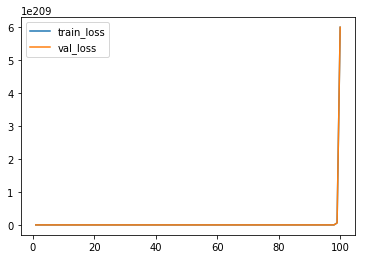

In [86]:
# 描画
x = np.arange(1, len(scr_lr.loss)+1)

plt.plot(x, scr_lr.loss, label="train_loss")
plt.plot(x, scr_lr.val_loss, label="val_loss")

plt.legend()
plt.show()